# Experiment 5

Experiment 5 aims to explore the robustness of the control in other pipe networks. Similar to Experiment 1, the experiment parameters will be the same though the starting locations will change due to the new pipe networks being used.

In [1]:
# import random
# random.seed(0)

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file_1 = 'networks/Net6.inp'
network_file_2 = 'networks/250701 K709vs2-Export.inp'
# Create the environment
env_1 = Network(network_file_1)
env_2 = Network(network_file_2)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g_1 = env_1.water_network_model.to_graph().to_undirected()
g_2 = env_2.water_network_model.to_graph().to_undirected()
deg_1 = g_1.degree
deg_2 = g_2.degree
start_pool_1 = [node for node, degree in deg_1 if degree == 1]
start_pool_2 = [node for node, degree in deg_2 if degree == 1]
print(f"Start pool - Net6: {start_pool_1}")
print(f"Number of start nodes: {len(start_pool_1)}")
print(f"Number of nodes: {len(g_1.nodes)}")
print(f"Number of links: {len(g_1.edges)}")
print(f"Start pool - K709vs2: {start_pool_2}")
print(f"Number of start nodes: {len(start_pool_2)}")
print(f"Number of nodes: {len(g_2.nodes)}")
print(f"Number of links: {len(g_2.edges)}")

Start pool - Net6: ['JUNCTION-12', 'JUNCTION-16', 'JUNCTION-20', 'JUNCTION-21', 'JUNCTION-38', 'JUNCTION-39', 'JUNCTION-40', 'JUNCTION-41', 'JUNCTION-45', 'JUNCTION-53', 'JUNCTION-74', 'JUNCTION-75', 'JUNCTION-81', 'JUNCTION-88', 'JUNCTION-96', 'JUNCTION-101', 'JUNCTION-113', 'JUNCTION-116', 'JUNCTION-138', 'JUNCTION-147', 'JUNCTION-150', 'JUNCTION-161', 'JUNCTION-178', 'JUNCTION-189', 'JUNCTION-204', 'JUNCTION-210', 'JUNCTION-218', 'JUNCTION-233', 'JUNCTION-234', 'JUNCTION-235', 'JUNCTION-247', 'JUNCTION-252', 'JUNCTION-255', 'JUNCTION-264', 'JUNCTION-266', 'JUNCTION-272', 'JUNCTION-276', 'JUNCTION-305', 'JUNCTION-311', 'JUNCTION-313', 'JUNCTION-332', 'JUNCTION-334', 'JUNCTION-341', 'JUNCTION-343', 'JUNCTION-346', 'JUNCTION-350', 'JUNCTION-351', 'JUNCTION-360', 'JUNCTION-367', 'JUNCTION-369', 'JUNCTION-371', 'JUNCTION-374', 'JUNCTION-392', 'JUNCTION-405', 'JUNCTION-409', 'JUNCTION-411', 'JUNCTION-419', 'JUNCTION-422', 'JUNCTION-431', 'JUNCTION-446', 'JUNCTION-455', 'JUNCTION-461', 'JU

## Function Definitions

In [4]:
# Function to filter simulation results
def filter_results(dataframe, simulations, data_of_interest):
    # Get the results from each simulation
    for start_node, path in simulations:
        # Read the simulation results csv file
        temp = pd.read_csv(f'{path}/results.csv')
        
        # Drop all the columns except the data of interest and turns
        temp = temp[['turn', data_of_interest]]
        
        # Transpose the dataframe
        temp = temp.T
        
        # Set the turns as the column names
        temp.columns = temp.iloc[0].astype(int)
        
        # Drop the turns row
        temp = temp.drop('turn')
        
        # Add the start node as a column
        temp['start_node'] = start_node
        
        # If the dataframe is empty, set it to the temp dataframe
        if dataframe.empty:
            dataframe = temp
        # Else, append the temp dataframe to the dataframe
        else:
            dataframe = pd.concat([dataframe, temp])
            
    # Create rows with the mean, max and min of each column
    dataframe.loc['mean'] = dataframe.mean(numeric_only=True, axis=0)
    dataframe.loc['max'] = dataframe.max(numeric_only=True, axis=0)
    dataframe.loc['min'] = dataframe.min(numeric_only=True, axis=0)
    
    # Return the dataframe
    return dataframe

## Create simulations

## Experiments

### Experiment 5.1
Uses Pipe Network 6 from Net6.inp

#### Simulation parameters:
- env: the network environment - Net6
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [5]:
start_nodes_1 = start_pool_1[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes_1}")

Start nodes: ['JUNCTION-12', 'JUNCTION-16', 'JUNCTION-20', 'JUNCTION-21', 'JUNCTION-38', 'JUNCTION-39', 'JUNCTION-40', 'JUNCTION-41', 'JUNCTION-45', 'JUNCTION-53', 'JUNCTION-74', 'JUNCTION-75', 'JUNCTION-81', 'JUNCTION-88', 'JUNCTION-96']


#### Experiment 5.1.1
- env: Net6
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment5/Network1/NoSwarm

In [6]:
simulations_5_2_1 = []

for start_node in start_nodes_1:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_1, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-5/Network1/NoSwarm")
    simulations_5_2_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_1}")

Starting simulation with start node: JUNCTION-12
Starting simulation with start node: JUNCTION-16
Starting simulation with start node: JUNCTION-20
Starting simulation with start node: JUNCTION-21
Starting simulation with start node: JUNCTION-38
Starting simulation with start node: JUNCTION-39
Starting simulation with start node: JUNCTION-40
Starting simulation with start node: JUNCTION-41
Starting simulation with start node: JUNCTION-45
Starting simulation with start node: JUNCTION-53
Starting simulation with start node: JUNCTION-74
Starting simulation with start node: JUNCTION-75
Starting simulation with start node: JUNCTION-81
Starting simulation with start node: JUNCTION-88
Starting simulation with start node: JUNCTION-96
Done: [('JUNCTION-12', 'notable-results/Experiment-5/Network1/NoSwarm/simulation_20230329_142324'), ('JUNCTION-16', 'notable-results/Experiment-5/Network1/NoSwarm/simulation_20230329_142340'), ('JUNCTION-20', 'notable-results/Experiment-5/Network1/NoSwarm/simulatio

In [7]:
df_5_1_1 = pd.DataFrame()
df_5_1_1 = filter_results(df_5_1_1, simulations_5_2_1, 'pct_links_explored')

#### Experiment 5.1.2
- env: Net6
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network1/NaiveSwarm

In [8]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_5_2_2 = []

for start_node in start_nodes_1:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_1, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network1/NaiveSwarm")
    simulations_5_2_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_2}")

Starting simulation with start node: JUNCTION-12
Starting simulation with start node: JUNCTION-16
Starting simulation with start node: JUNCTION-20
Starting simulation with start node: JUNCTION-21
Starting simulation with start node: JUNCTION-38
Starting simulation with start node: JUNCTION-39
Starting simulation with start node: JUNCTION-40
Starting simulation with start node: JUNCTION-41
Starting simulation with start node: JUNCTION-45
Starting simulation with start node: JUNCTION-53
Starting simulation with start node: JUNCTION-74
Starting simulation with start node: JUNCTION-75
Starting simulation with start node: JUNCTION-81
Starting simulation with start node: JUNCTION-88
Starting simulation with start node: JUNCTION-96
Done: [('JUNCTION-12', 'notable-results/Experiment-5/Network1/NaiveSwarm/simulation_20230329_142721'), ('JUNCTION-16', 'notable-results/Experiment-5/Network1/NaiveSwarm/simulation_20230329_142736'), ('JUNCTION-20', 'notable-results/Experiment-5/Network1/NaiveSwarm/

In [9]:
df_5_1_2 = pd.DataFrame()
df_5_1_2 = filter_results(df_5_1_2, simulations_5_2_2, 'pct_links_explored')

#### Experiment 5.1.3
- env: Net6
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network1/InformedMeanSwarm

In [10]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_5_2_3 = []

for start_node in start_nodes_1:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_1, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network1/InformedMeanSwarm")
    simulations_5_2_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_3}")

Starting simulation with start node: JUNCTION-12
Starting simulation with start node: JUNCTION-16
Starting simulation with start node: JUNCTION-20
Starting simulation with start node: JUNCTION-21
Starting simulation with start node: JUNCTION-38
Starting simulation with start node: JUNCTION-39
Starting simulation with start node: JUNCTION-40
Starting simulation with start node: JUNCTION-41
Starting simulation with start node: JUNCTION-45
Starting simulation with start node: JUNCTION-53
Starting simulation with start node: JUNCTION-74
Starting simulation with start node: JUNCTION-75
Starting simulation with start node: JUNCTION-81
Starting simulation with start node: JUNCTION-88
Starting simulation with start node: JUNCTION-96
Done: [('JUNCTION-12', 'notable-results/Experiment-5/Network1/InformedMeanSwarm/simulation_20230329_143058'), ('JUNCTION-16', 'notable-results/Experiment-5/Network1/InformedMeanSwarm/simulation_20230329_143114'), ('JUNCTION-20', 'notable-results/Experiment-5/Networ

In [11]:
df_5_1_3 = pd.DataFrame()
df_5_1_3 = filter_results(df_5_1_3, simulations_5_2_3, 'pct_links_explored')

#### Experiment 5.1.4
- env: Net6
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network1/InformedMedianSwarm

In [12]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_5_2_4 = []

for start_node in start_nodes_1:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_1, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network1/InformedMedianSwarm")
    simulations_5_2_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_4}")

Starting simulation with start node: JUNCTION-12
Starting simulation with start node: JUNCTION-16
Starting simulation with start node: JUNCTION-20
Starting simulation with start node: JUNCTION-21
Starting simulation with start node: JUNCTION-38
Starting simulation with start node: JUNCTION-39
Starting simulation with start node: JUNCTION-40
Starting simulation with start node: JUNCTION-41
Starting simulation with start node: JUNCTION-45
Starting simulation with start node: JUNCTION-53
Starting simulation with start node: JUNCTION-74
Starting simulation with start node: JUNCTION-75
Starting simulation with start node: JUNCTION-81
Starting simulation with start node: JUNCTION-88
Starting simulation with start node: JUNCTION-96
Done: [('JUNCTION-12', 'notable-results/Experiment-5/Network1/InformedMedianSwarm/simulation_20230329_143442'), ('JUNCTION-16', 'notable-results/Experiment-5/Network1/InformedMedianSwarm/simulation_20230329_143500'), ('JUNCTION-20', 'notable-results/Experiment-5/Ne

In [13]:
df_5_1_4 = pd.DataFrame()
df_5_1_4 = filter_results(df_5_1_4, simulations_5_2_4, 'pct_links_explored')

### Experiment 5.2

Uses Pipe Network 250701 K709vs2-Export from 250701 K709vs2-Export.inp - this was the pipe network used in the Sheffield paper.

#### Simulation parameters:
- env: the network environment - 250701 K709vs2-Export
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [14]:
start_nodes_2 = start_pool_2[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes_2}")

Start nodes: ['A2148', 'A3007', 'A3018', 'A5065', 'A5071', 'A5078', 'A5153', 'A5169', 'A5174', 'A5175', 'A5178', 'A5183', 'A5184', 'A5185', 'A5187']


#### Experiment 5.2.1
- env: Net250701 K709vs2-Export
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment5/Network2/NoSwarm

In [15]:
simulations_5_2_1 = []

for start_node in start_nodes_2:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_2, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-5/Network2/NoSwarm")
    simulations_5_2_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_1}")

Starting simulation with start node: A2148
Starting simulation with start node: A3007
Starting simulation with start node: A3018
Starting simulation with start node: A5065
Starting simulation with start node: A5071
Starting simulation with start node: A5078
Starting simulation with start node: A5153
Starting simulation with start node: A5169
Starting simulation with start node: A5174
Starting simulation with start node: A5175
Starting simulation with start node: A5178
Starting simulation with start node: A5183
Starting simulation with start node: A5184
Starting simulation with start node: A5185
Starting simulation with start node: A5187
Done: [('A2148', 'notable-results/Experiment-5/Network2/NoSwarm/simulation_20230329_143826'), ('A3007', 'notable-results/Experiment-5/Network2/NoSwarm/simulation_20230329_143828'), ('A3018', 'notable-results/Experiment-5/Network2/NoSwarm/simulation_20230329_143831'), ('A5065', 'notable-results/Experiment-5/Network2/NoSwarm/simulation_20230329_143833'), 

In [16]:
df_5_2_1 = pd.DataFrame()
df_5_2_1 = filter_results(df_5_2_1, simulations_5_2_1, 'pct_links_explored')

#### Experiment 5.2.2
- env: Net250701 K709vs2-Export
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network2/NaiveSwarm

In [17]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_5_2_2 = []

for start_node in start_nodes_2:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_2, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network2/NaiveSwarm")
    simulations_5_2_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_2}")

Starting simulation with start node: A2148
Starting simulation with start node: A3007
Starting simulation with start node: A3018
Starting simulation with start node: A5065
Starting simulation with start node: A5071
Starting simulation with start node: A5078
Starting simulation with start node: A5153
Starting simulation with start node: A5169
Starting simulation with start node: A5174
Starting simulation with start node: A5175
Starting simulation with start node: A5178
Starting simulation with start node: A5183
Starting simulation with start node: A5184
Starting simulation with start node: A5185
Starting simulation with start node: A5187
Done: [('A2148', 'notable-results/Experiment-5/Network2/NaiveSwarm/simulation_20230329_143859'), ('A3007', 'notable-results/Experiment-5/Network2/NaiveSwarm/simulation_20230329_143901'), ('A3018', 'notable-results/Experiment-5/Network2/NaiveSwarm/simulation_20230329_143903'), ('A5065', 'notable-results/Experiment-5/Network2/NaiveSwarm/simulation_2023032

In [18]:
df_5_2_2 = pd.DataFrame()
df_5_2_2 = filter_results(df_5_2_2, simulations_5_2_2, 'pct_links_explored')

#### Experiment 5.2.3
- env: Net250701 K709vs2-Export
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network2/InformedMeanSwarm

In [19]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_5_2_3 = []

for start_node in start_nodes_2:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_2, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network2/InformedMeanSwarm")
    simulations_5_2_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_3}")

Starting simulation with start node: A2148
Starting simulation with start node: A3007
Starting simulation with start node: A3018
Starting simulation with start node: A5065
Starting simulation with start node: A5071
Starting simulation with start node: A5078
Starting simulation with start node: A5153
Starting simulation with start node: A5169
Starting simulation with start node: A5174
Starting simulation with start node: A5175
Starting simulation with start node: A5178
Starting simulation with start node: A5183
Starting simulation with start node: A5184
Starting simulation with start node: A5185
Starting simulation with start node: A5187
Done: [('A2148', 'notable-results/Experiment-5/Network2/InformedMeanSwarm/simulation_20230329_143930'), ('A3007', 'notable-results/Experiment-5/Network2/InformedMeanSwarm/simulation_20230329_143932'), ('A3018', 'notable-results/Experiment-5/Network2/InformedMeanSwarm/simulation_20230329_143934'), ('A5065', 'notable-results/Experiment-5/Network2/Informed

In [20]:
df_5_2_3 = pd.DataFrame()
df_5_2_3 = filter_results(df_5_2_3, simulations_5_2_3, 'pct_links_explored')

#### Experiment 5.2.4
- env: Net250701 K709vs2-Export
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/Network2/InformedMedianSwarm

In [21]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_5_2_4 = []

for start_node in start_nodes_2:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env_2, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-5/Network2/InformedMedianSwarm")
    simulations_5_2_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_5_2_4}")

Starting simulation with start node: A2148
Starting simulation with start node: A3007
Starting simulation with start node: A3018
Starting simulation with start node: A5065
Starting simulation with start node: A5071
Starting simulation with start node: A5078
Starting simulation with start node: A5153
Starting simulation with start node: A5169
Starting simulation with start node: A5174
Starting simulation with start node: A5175
Starting simulation with start node: A5178
Starting simulation with start node: A5183
Starting simulation with start node: A5184
Starting simulation with start node: A5185
Starting simulation with start node: A5187
Done: [('A2148', 'notable-results/Experiment-5/Network2/InformedMedianSwarm/simulation_20230329_144000'), ('A3007', 'notable-results/Experiment-5/Network2/InformedMedianSwarm/simulation_20230329_144002'), ('A3018', 'notable-results/Experiment-5/Network2/InformedMedianSwarm/simulation_20230329_144004'), ('A5065', 'notable-results/Experiment-5/Network2/In

In [22]:
df_5_2_4 = pd.DataFrame()
df_5_2_4 = filter_results(df_5_2_4, simulations_5_2_4, 'pct_links_explored')

## Analysis

In [23]:
# Function to create a dataframe with the results of the experiment
from typing import List

def create_dataframe(swarm_types:list, experiment_dataframes:List[pd.DataFrame]):
    # Create a new dataframe
    df = pd.DataFrame()
    # Zip the swarm types and the dataframes together
    for swarm_type, dataframe in zip(swarm_types, experiment_dataframes):
        df[f'{swarm_type}-mean'] = dataframe.loc['mean']
        df[f'{swarm_type}-max'] = dataframe.loc['max']
        df[f'{swarm_type}-min'] = dataframe.loc['min']
        
    # Drop any columns that are all NaN
    df = df.dropna(axis=1, how='all')
    
    # Drop any rows that are all NaN
    df = df.dropna(axis=0, how='all')
        
    # Return the dataframe
    return df

# Function to plot the error bars
def plot_errorbar(df, swarm_type, ax, color, label, errorevery):
    ax.errorbar(
        df.index,
        df[f'{swarm_type}-mean'],
        yerr=[df[f'{swarm_type}-mean'] - df[f'{swarm_type}-min'], df[f'{swarm_type}-max'] - df[f'{swarm_type}-mean']],
        errorevery=errorevery,
        label=label,
        color=color,
        capsize=5)
    
# Function to fill in the area between the error bars
def fill_area_between_min_and_max(dataframe, swarm_type, ax, colour='lightblue', alpha=0.3):
    x = dataframe.index.astype(int)
    y1 = dataframe[f'{swarm_type}-min'].astype(float)
    y2 = dataframe[f'{swarm_type}-max'].astype(float)
        
    ax.fill_between(x, y1, y2, color=colour, alpha=alpha)
 
# Function to plot the variance of the percentage explored (max - min for each turn)   
def plot_variance(dataframe:pd.DataFrame, metric:str, ylim:tuple=(0,100)):
    no_swarm_variance = dataframe['no-swarm-max'] - dataframe['no-swarm-min']
    naive_swarm_variance = dataframe['naive-max'] - dataframe['naive-min']
    informed_mean_swarm_variance = dataframe['informed-mean-max'] - dataframe['informed-mean-min']
    informed_median_swarm_variance = dataframe['informed-median-max'] - dataframe['informed-median-min']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(dataframe.index, no_swarm_variance, color='black', label='No Swarm')
    ax.plot(dataframe.index, naive_swarm_variance, color='blue', label='Naive Swarm')
    ax.plot(dataframe.index, informed_mean_swarm_variance, color='green', label='Informed Swarm (Mean)')
    ax.plot(dataframe.index, informed_median_swarm_variance, color='red', label='Informed Swarm (Median)')
    
    if metric.lower().strip() == 'nodes':
        ax.set_title("Variance of Percentage of Nodes Explored by Turn")
    elif metric.lower().strip() == 'links':
        ax.set_title("Variance of Percentage of Links Explored by Turn")
        
    ax.set_xlabel("Turn")
    ax.set_ylabel("Variance")
    
    ax.legend()
    
    y_min, y_max = ylim
    ax.set_ylim(y_min, y_max)
    
    plt.show()

### Experiment 5.1.X - Percentage Links Explored by Agents Analysis

In [36]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_5_1_1, df_5_1_2, df_5_1_3, df_5_1_4]

experiment_5_1_results = create_dataframe(swarm_types, experiment_dataframes)

experiment_5_1_results

,no-swarm-mean,no-swarm-max,no-swarm-min,naive-mean,naive-max,naive-min,informed-mean-mean,informed-mean-max,informed-mean-min,informed-median-mean,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611,0.02611
1,0.052219,0.052219,0.052219,0.076588,0.104439,0.052219,0.076588,0.104439,0.052219,0.076588,0.104439,0.052219
2,0.074848,0.078329,0.052219,0.147955,0.208877,0.078329,0.140992,0.208877,0.078329,0.140992,0.208877,0.078329
3,0.099217,0.104439,0.078329,0.222802,0.339426,0.104439,0.228024,0.313316,0.104439,0.228024,0.313316,0.104439
4,0.123586,0.130548,0.104439,0.288947,0.443864,0.130548,0.3255,0.469974,0.156658,0.3255,0.469974,0.156658
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.671018,2.29765,0.234987,4.563969,7.180157,2.715405,5.820714,9.765013,2.715405,5.820714,9.765013,2.715405
96,1.690165,2.32376,0.234987,4.607485,7.232376,2.741514,5.876414,9.765013,2.741514,5.876414,9.765013,2.741514
97,1.707572,2.32376,0.234987,4.656223,7.284595,2.793734,5.932115,9.791123,2.767624,5.932115,9.791123,2.767624


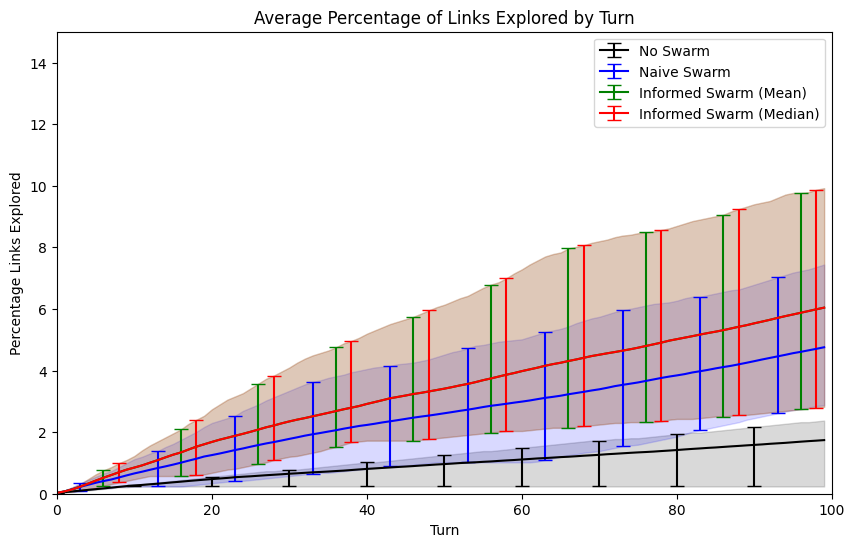

In [25]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
plot_errorbar(experiment_5_1_results, 'no-swarm', ax, 'black', 'No Swarm', errorevery=(0,10))

# Plot the naive swarm results with error bars
plot_errorbar(experiment_5_1_results, 'naive', ax, 'blue', 'Naive Swarm', errorevery=(3,10))

# Plot the informed swarm results
plot_errorbar(experiment_5_1_results, 'informed-mean', ax, 'green', 'Informed Swarm (Mean)', errorevery=(6,10))

# Plot the informed swarm results
plot_errorbar(experiment_5_1_results, 'informed-median', ax, 'red', 'Informed Swarm (Median)', errorevery=(8,10))

# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max(experiment_5_1_results, 'no-swarm', ax, colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max(experiment_5_1_results, 'naive', ax, colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max(experiment_5_1_results, 'informed-mean', ax, colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max(experiment_5_1_results, 'informed-median', ax, colour='red', alpha=0.15)

# Set the title and labels
ax.set_title("Average Percentage of Links Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Links Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 15)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

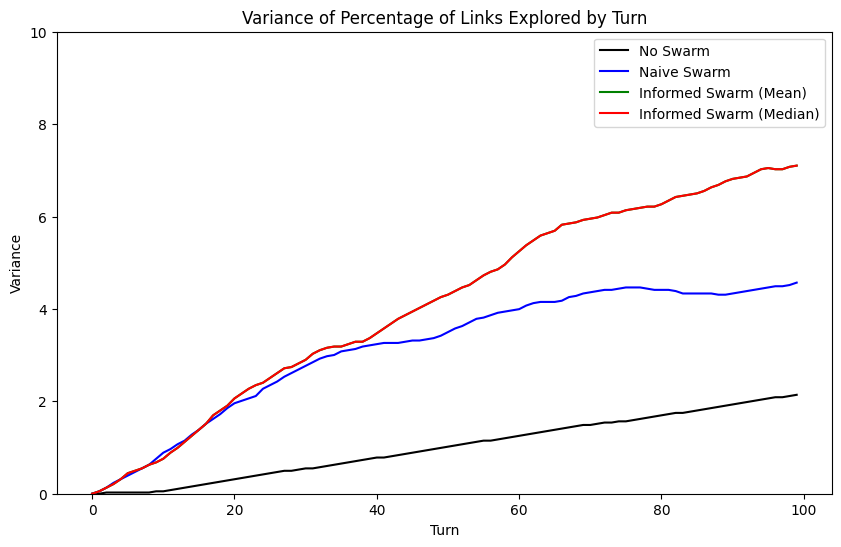

In [26]:
plot_variance(experiment_5_1_results, 'links', ylim=(0, 10))

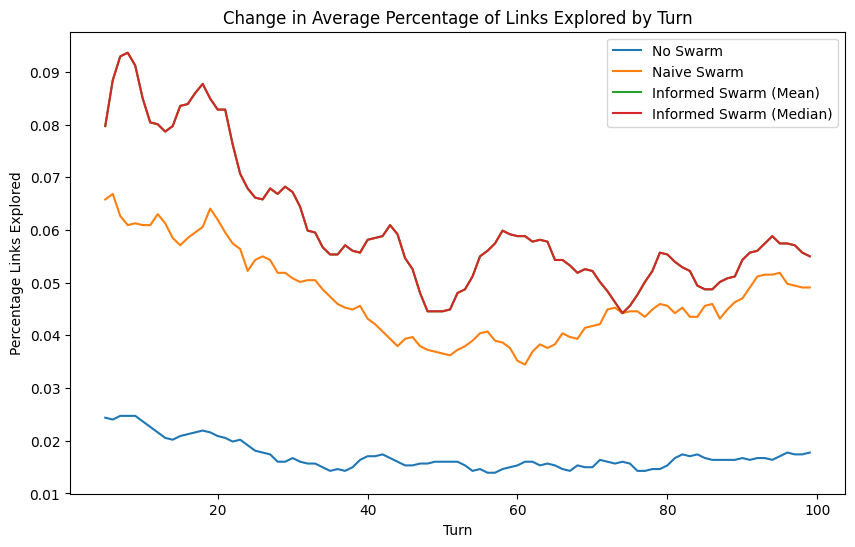

In [33]:
# Plot the change in the average percentage of links explored by turn
fig, ax = plt.subplots(figsize=(10, 6))

no_swarm_mean_diff = experiment_5_1_results['no-swarm-mean'].diff()
naive_mean_diff = experiment_5_1_results['naive-mean'].diff()
informed_mean_mean_diff = experiment_5_1_results['informed-mean-mean'].diff()
informed_median_mean_diff = experiment_5_1_results['informed-median-mean'].diff()

# Smooth the data
no_swarm_mean_diff = no_swarm_mean_diff.rolling(window=5).mean()
naive_mean_diff = naive_mean_diff.rolling(window=5).mean()
informed_mean_mean_diff = informed_mean_mean_diff.rolling(window=5).mean()
informed_median_mean_diff = informed_median_mean_diff.rolling(window=5).mean()

plt.plot(no_swarm_mean_diff, label='No Swarm')
plt.plot(naive_mean_diff, label='Naive Swarm')
plt.plot(informed_mean_mean_diff, label='Informed Swarm (Mean)')
plt.plot(informed_median_mean_diff, label='Informed Swarm (Median)')

plt.title("Change in Average Percentage of Links Explored by Turn")
plt.xlabel("Turn")
plt.ylabel("Percentage Links Explored")

plt.legend()

plt.show()

### Experiment 5.2.X - Percentage Links Explored by Agents Analysis

In [27]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_5_2_1, df_5_2_2, df_5_2_3, df_5_2_4]

experiment_5_2_results = create_dataframe(swarm_types, experiment_dataframes)

# experiment_1_2_results

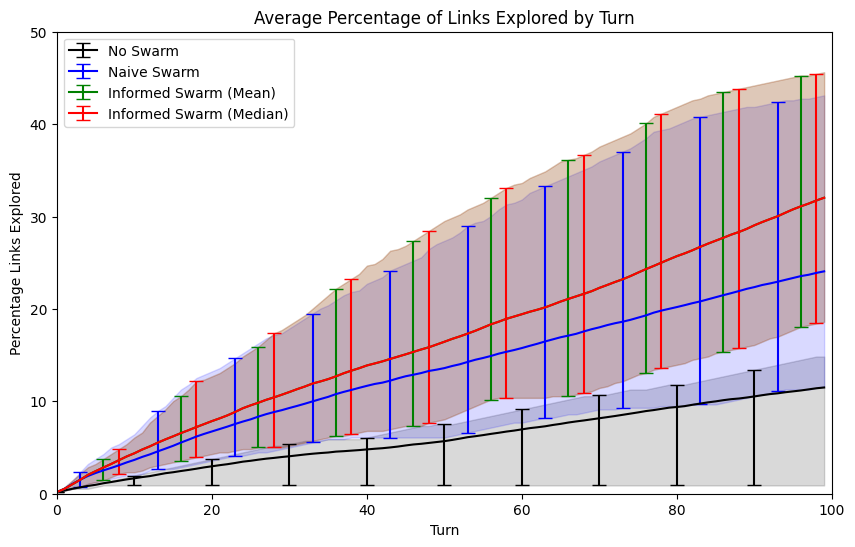

In [31]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
plot_errorbar(experiment_5_2_results, 'no-swarm', ax, 'black', 'No Swarm', errorevery=(0,10))

# Plot the naive swarm results with error bars
plot_errorbar(experiment_5_2_results, 'naive', ax, 'blue', 'Naive Swarm', errorevery=(3,10))

# Plot the informed swarm results
plot_errorbar(experiment_5_2_results, 'informed-mean', ax, 'green', 'Informed Swarm (Mean)', errorevery=(6,10))

# Plot the informed swarm results
plot_errorbar(experiment_5_2_results, 'informed-median', ax, 'red', 'Informed Swarm (Median)', errorevery=(8,10))

# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max(experiment_5_2_results, 'no-swarm', ax, colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max(experiment_5_2_results, 'naive', ax, colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max(experiment_5_2_results, 'informed-mean', ax, colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max(experiment_5_2_results, 'informed-median', ax, colour='red', alpha=0.15)

# Set the title and labels
ax.set_title("Average Percentage of Links Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Links Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 50)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

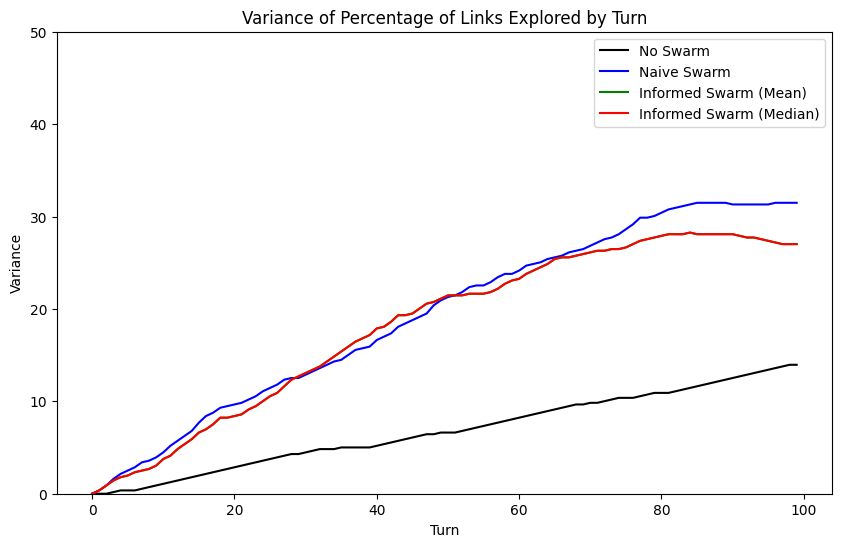

In [32]:
plot_variance(experiment_5_2_results, 'links', ylim=(0, 50))

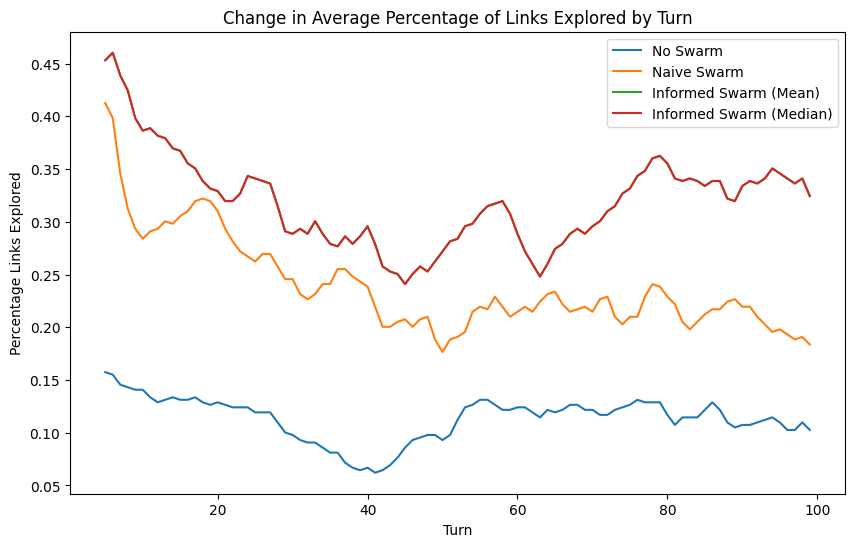

In [37]:
# Plot the change in the average percentage of links explored by turn
fig, ax = plt.subplots(figsize=(10, 6))

no_swarm_mean_diff = experiment_5_2_results['no-swarm-mean'].diff()
naive_mean_diff = experiment_5_2_results['naive-mean'].diff()
informed_mean_mean_diff = experiment_5_2_results['informed-mean-mean'].diff()
informed_median_mean_diff = experiment_5_2_results['informed-median-mean'].diff()

# Smooth the data
no_swarm_mean_diff = no_swarm_mean_diff.rolling(window=5).mean()
naive_mean_diff = naive_mean_diff.rolling(window=5).mean()
informed_mean_mean_diff = informed_mean_mean_diff.rolling(window=5).mean()
informed_median_mean_diff = informed_median_mean_diff.rolling(window=5).mean()

plt.plot(no_swarm_mean_diff, label='No Swarm')
plt.plot(naive_mean_diff, label='Naive Swarm')
plt.plot(informed_mean_mean_diff, label='Informed Swarm (Mean)')
plt.plot(informed_median_mean_diff, label='Informed Swarm (Median)')

plt.title("Change in Average Percentage of Links Explored by Turn")
plt.xlabel("Turn")
plt.ylabel("Percentage Links Explored")

plt.legend()

plt.show()